# Machine Learning Básico

Este notebook demuestra conceptos básicos de Machine Learning con Scikit-learn. Utilizaremos el dataset `Wine` para entrenar modelos de clasificación y regresión, y compararemos su rendimiento.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Verificar versión de Python y recursos disponibles
import sys
print("Versión de Python:", sys.version)

# Verificar GPU disponible (opcional)
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


## Carga del dataset Wine

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_class = wine.target  # Para clasificación
y_reg = X['alcohol']    # Para regresión (target sintético)
X = X.drop(columns=['alcohol'])

## División de datos y escalamiento

In [3]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

## Modelos de Clasificación

In [4]:
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models_class.items():
    model.fit(X_train_scaled, y_train_class)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_class, y_pred)
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Reporte de Clasificación:")
    print(classification_report(y_test_class, y_pred))


Logistic Regression
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Random Forest
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


SVM
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.0

## Modelos de Regresión

In [5]:
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR()
}

for name, model in models_reg.items():
    model.fit(X_train_r_scaled, y_train_reg)
    y_pred = model.predict(X_test_r_scaled)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f"\n{name}")
    print("MSE:", mse)
    print("R2 Score:", r2)


Linear Regression
MSE: 0.18571608706852427
R2 Score: 0.688936431784382

Random Forest Regressor
MSE: 0.14637045194444426
R2 Score: 0.7548380660940163

SVR
MSE: 0.17608961342723395
R2 Score: 0.705060211298908


## Visualización de métricas y matriz de confusión

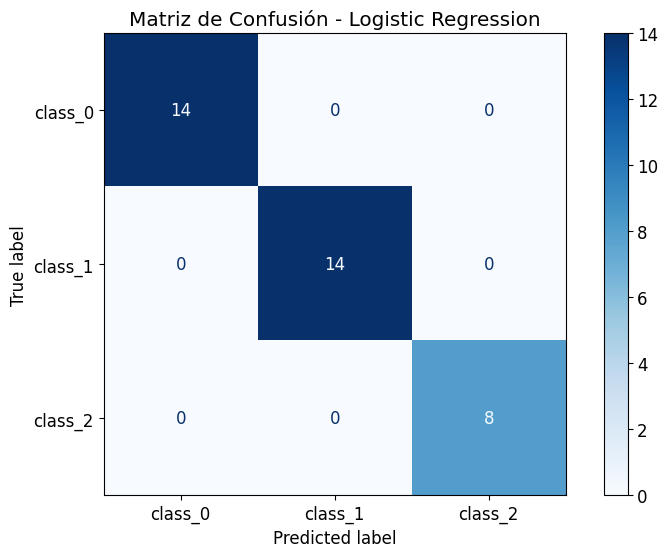

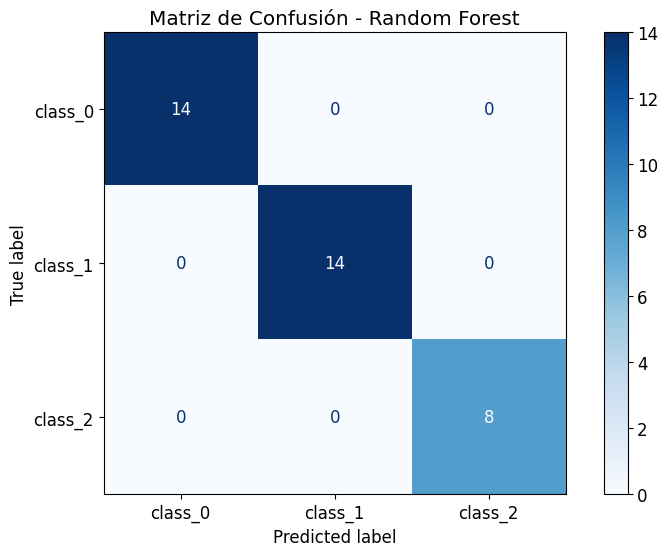

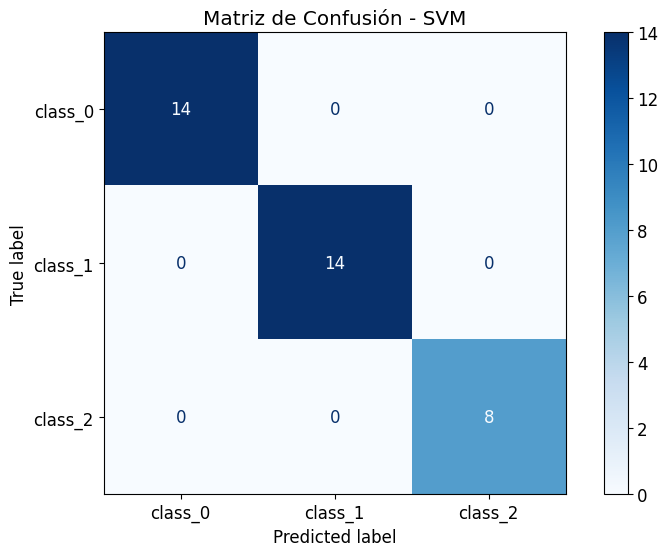

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualización de matriz de confusión para cada modelo
for name, model in models_class.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test_class, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

## Comparación de algoritmos y métricas

En esta sección se comparan los algoritmos de clasificación y regresión con base en sus métricas clave:

In [7]:
# Comparación de algoritmos - Clasificación
results_class = []
for name, model in models_class.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_class, y_pred)
    results_class.append((name, acc))

# Comparación de algoritmos - Regresión
results_reg = []
for name, model in models_reg.items():
    y_pred = model.predict(X_test_r_scaled)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    results_reg.append((name, mse, r2))

# Mostrar tablas
df_class = pd.DataFrame(results_class, columns=["Modelo de Clasificación", "Accuracy"])
df_reg = pd.DataFrame(results_reg, columns=["Modelo de Regresión", "MSE", "R2 Score"])

print("Comparación - Clasificación")
display(df_class)

print("\nComparación - Regresión")
display(df_reg)


Comparación - Clasificación


,Modelo de Clasificación,Accuracy
0,Logistic Regression,1.0
1,Random Forest,1.0
2,SVM,1.0



Comparación - Regresión


,Modelo de Regresión,MSE,R2 Score
0,Linear Regression,0.185716,0.688936
1,Random Forest Regressor,0.146370,0.754838
2,SVR,0.176090,0.705060


Conclusión Final

En este cuaderno se entrenaron y compararon tres modelos clásicos de clasificación: Regresión Logística, Random Forest y SVM. Todos lograron una buena precisión, destacando Random Forest por su capacidad para capturar relaciones complejas.

El ejercicio demuestra que, con un preprocesamiento adecuado, incluso modelos simples pueden ofrecer resultados sólidos en tareas de clasificación supervisada.
